<center><img src="https://media-exp1.licdn.com/dms/image/C4E22AQEbIXZiRVkJPQ/feedshare-shrink_2048_1536/0?e=1605139200&v=beta&t=opmJLG_veDflQesF9uJvIhSXbmwPY3DGSlbZo1v-w2k" width="1000"></center>

# Programa de Especialización en Python

## Tema 8. Análisis de Discriminante 

### Prof. Manuel Sigüeñas, M.Sc.(c)

<a id='beginning'></a>


1. [Análisis Discriminante lineal](#part1) 
    
    a. [Análisis Discriminante de Fisher](#part2)<br>
    b. [Clasificación](#part3)<br>
<br>
2. [Análisis Discriminante Cuadrático (QDA)](#part6) 

    a. [Aspectos Generales I](#part7)<br>
    b. [Discriminante Cuadrático](#part8)<br>
    c. [Clasificación](#part9)<br>
    d. [Fronteras de Decisión en QDA I](#part10)<br>
    e. [Estimación de parámetros en QDA I](#part11)<br>
<br>

In [1]:
from IPython.display import Image
%matplotlib inline

<a id='part1'></a>
# Análisis Discriminante Lineal

- Se tiene dos grupos $C_1$ y $ C_2$
<br>

- Considerar que $\mu_1$ y $\mu_2$ son los vectores de medias de las respectivas clases.
<br>

- Asumir que ambas poblaciones tienen la misma matriz de convarianza $\Sigma_1 = \Sigma_2 = \Sigma$
<br>

- Un individuo $x$ = $(x_1,x_2,...,x_p$ es asignado a la clase $C_1$ si $$D(x,C_1) < D(x,C_2)$$

- Donde <br>$$D(x,C_1)=(x,\mu_i)^T \Sigma^{-1}(x-\mu_1)$$
    <br>representa el cuadrado de la Distancia de Mahanlanobis del individuo $x$ al centro de la $C_1$.}


- Se puede demostrar que un individuo $x$ se asigna a la clase $C_1$ si
$$(\mu_1-\mu_2)^T \Sigma^{-1}(x-\frac{1}{2}\left(\mu_1+\mu_2\right))>0$$
<br>

- Esta función es denominada función discriminante lineal
<br>

- $\mu_i$ puede ser estimada por $\bar{x}_i$.
<br>

- $\Sigma$ es estiamada por $S=\frac{(n_1-1)S_1+(n_2-1)S_2}{n_1+n_2-2}$ donde $S_1$ y $S_2$ representan las matrices de covarianza muestral de cada clase.

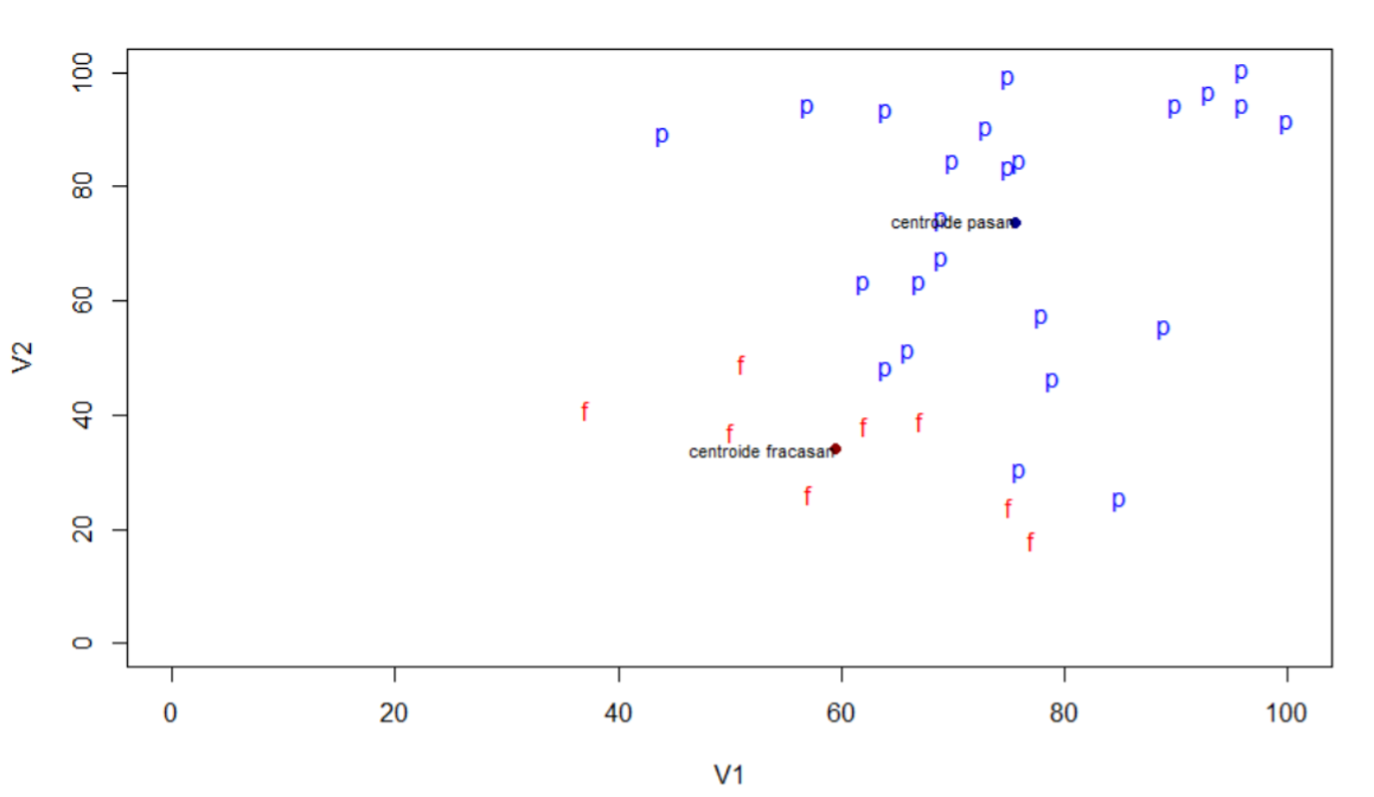

In [3]:
Image(filename='D:/Python/2. Nivel II/8/imagenes/imagen1.png', width=600) 

<a id='part2'></a>
## Análisis Discriminante de Fisher

- El análisis discriminante permite diferenciar entre cualquier número de grupos. 
<br>

- Por simplicidad, analizaremos el caso de dos grupos y solo dos variables independientes. 
<br>

- El propósito del análisis discriminante consiste en aprovechar la información contenida en las variables independientes para crear una función $D$ combinación lineal de $X_1$ y $X_2$ capaz de diferenciar lo más posible a ambos grupos.


- La función discriminante es de la forma:
$$D= b_1X_1+b_2X_2$$
<br>

- Donde $b_1$ y $b_2$ son las ponderaciones de las variables independientes que consiguen hacer que los sujetos de uno de los grupos obtengan puntuaciones máximas en $D,$ y los sujetos de otro grupo de puntuaciones mínimas.

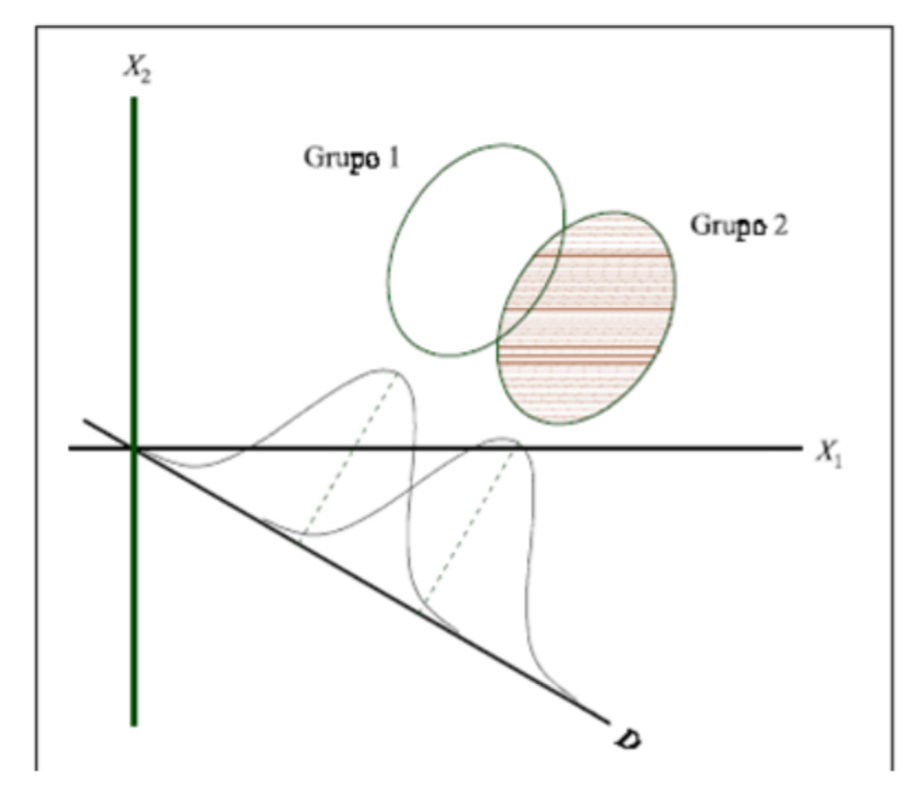

In [4]:
Image(filename='D:/Python/2. Nivel II/8/imagenes/imagen3.png', width=600) 

- Sustituyendo en la función discriminante del valor de las medias del grupo 1 en las variables $X_1$ y $X_2$, obtengamos el centroide del grupo 1:
$$\bar{d}_2= b_1\bar{x}^{(2)}_1+b_2\bar{x}^{(2)}_2$$

- La función $D$ debe ser tal que la distancia $h$ entre dos centroides sea máxima, consiguiendo de esta forma que los grupos estén lo más distante posible. Podemos expresar esta distancia de la siguiente manera:
$$h=\bar{d}_1-\bar{d}_2$$
    donde $\bar{d}_1 y \bar{d}_1$ son las medias del grupo 1 y del grupo 2 en la función $D$.

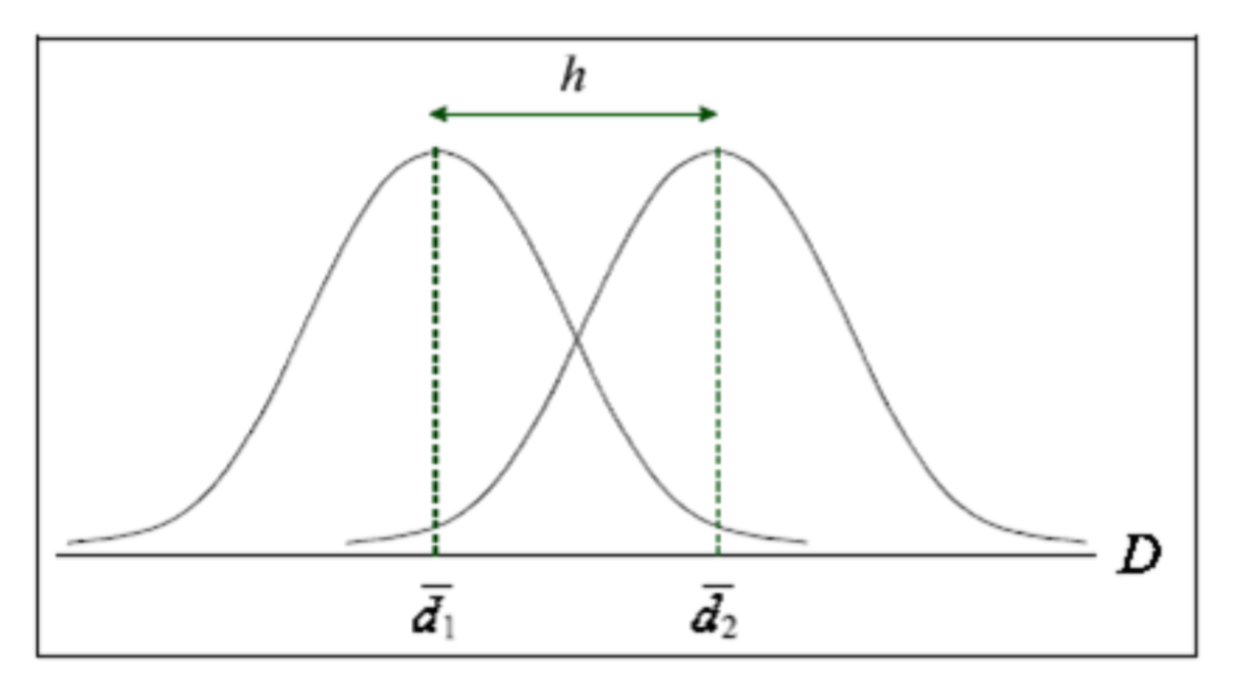

In [5]:
Image(filename='D:/Python/2. Nivel II/8/imagenes/imagen4.png', width=600) 

- Supongamos que conocemos de antemano la probabilidad a priori $\pi_1(i=1,2,...,G)$ de que un individuo pertenezca a la clase $C_i$.
<br>

- Si no se conoce información adicional entonces un objeto cualquiera sera clasificado como perteneciente a la clase $C_1$ si $$\pi_i>\pi_j$$ para $$i = 1,2,..., G.i \neq j$$

<a id='part3'></a>
## Clasificación

- Sin embargo, usualmente alguna información adicional es conocida, tal como un vector $x$ de mediciones hechas a un individuo a ser clasificado.
<br>

- En este caso, comparamos la probabilidad de pertenecer a cada clase para un objeto con vector de mediciones $x$, y el objeto es clasificado comode la clase $C_i$ si
$$P(C_i|x)>P(C_j|x)$$ para todo $$i\neq j$$

- Las probabilidades $P(C_1|x)$ son llamadas probabilidades posteriores. Desafortunadamente, estas probabilidades raras veces son conocidad y deben ser estimadas.
<br>

- Una formulación mas conveniente de la regla enterior puede ser obtenidad aplicando el teorema de Bayes, que afirma que 
    $$P(C_1\|x) = \frac{f(x\|C_j)\pi_j}{f(x)}$$
donde $f(x|C_j)$ es la densidad condicional de la clase $C_j$




- Por lo tanto un obejto sera clasificado en el clase $C_1$ si $$f(x|C_i) \pi_i>f(x|C_j)\pi_j$$ 
    - para todo  
$$ i\neq j$$
<br>
- Densidad Condicional de la clase $C_i$>Densidad Condicional de la clase $C_j$

- Considerando ahora 2 clases $C_1$ y $C_2$ y que siguen una distribución normal multivariada
$$x|C_1 \sim N_p(\mu_1,\sum)$$
$$x|C_2 \sim N_p(\mu_2,\sum)$$
<br>
- Esto es 
$$f(x|C_1) = \frac{1}{(2\pi)^{k/2}|\Sigma|^{1/2}}exp\left(-\frac{1}{2}(x-\mu_1)^{T}\Sigma^{-1}(x-\mu_1)\right)$$
$$f(x|C_1) = \frac{1}{(2\pi)^{k/2}|\Sigma|^{1/2}}exp\left(-\frac{1}{2}(x-\mu_2)^{T}\Sigma^{-1}(x-\mu_2)\right)$$

- Un objeto es clasificado en la clase $C_1$ si 
$$\frac{exp\left(-\frac{1}{2}(x-\mu_1)^{T}\Sigma^{-1}(x-\mu_1)\right)}{exp\left(-\frac{1}{2}(x-\mu_2)^{T}\Sigma^{-1}(x-\mu_2)\right)}>\frac{\pi_2}{\pi_1}$$
<br>

- Tomando logaritmos a ambos lados y simplificando se obtiene que un individuo es clasificado en la clase $C_1$ si 
$$(\mu_1-\mu_2)^T\Sigma^{-1}\left(x-\frac{1}{2}(\mu_1+\mu_2)\right)>log\frac{\pi_2}{\pi_1}$$
<br>

- Este resultado es similar al obtenido anteriormente excepto por el termino del lado derecho. Si ademas consideramos que las probabilidades a priori son iguales $(\pi_1=\pi_2)$ entonces si se obtendria la misma expresión.

___

### __Características:__

* Técnica predictiva de clasificación
* El análisis discriminante ayuda a identificar las características que diferencian (discriminan) a dos o más grupos y a crear una función capaz de distinguir con la mayor precisión posible a los miembros de un grupo u otro.
* LDA también es un método de reducción de dimensión, dado que tomando n variables independientes del conjunto de datos, el método estrae $p \leq n$ nuevas variables independientes que más contribuyen a la separación de clases de la variable dependiente.
* Los parámetros estimados en el modelo de regresión logística son inestables.
* LDA es más estable que la regresión logística.
* Cuando se trata de un problema de clasificación con solo dos niveles, ambos métodos suelen llegar a resultados similares.

<img src="https://miro.medium.com/max/700/1*o2TKovc_lkJ9_ISxZxrbog.png" width="300" alt="Python logo"  />

<img src="https://miro.medium.com/max/700/1*5lugB_AavKEr3ghDGC6hOA.png" width="300" alt="Python logo"  />

<img src="https://miro.medium.com/max/635/1*Z202fIHoHkW5KhxxXcQ8jA.png" width="300" alt="Python logo"  />

<img src="https://miro.medium.com/max/700/1*Fz3JQ80No5Nnbap28EGRTg.png" width="300" alt="Python logo"  />

<img src="https://miro.medium.com/max/700/1*5lhckC2RQzq28zNL7WtU5A.png" width="300" alt="Python logo"  />

<img src="https://miro.medium.com/max/700/1*W48aQ0LkZ5dm1_uow6FD2w.png" width="300" alt="Python logo"  />

### __Análisis discriminante lineal con scikit-learn__

In [16]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [41]:
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Categorical.from_codes(wine.target, wine.target_names)

In [42]:
X.shape

(178, 13)

In [43]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [44]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [45]:
df = X.join(pd.Series(y, name='class'))

In [46]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


In [48]:
class_feature_means = pd.DataFrame(columns=wine.target_names)
for c, rows in df.groupby('class'):
    class_feature_means[c] = rows.mean()
class_feature_means

/home/sergio/anaconda3/envs/ia/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


,class_0,class_1,class_2
alcohol,13.744746,12.278732,13.153750
malic_acid,2.010678,1.932676,3.333750
ash,2.455593,2.244789,2.437083
alcalinity_of_ash,17.037288,20.238028,21.416667
magnesium,106.338983,94.549296,99.312500
total_phenols,2.840169,2.258873,1.678750
flavanoids,2.982373,2.080845,0.781458
nonflavanoid_phenols,0.290000,0.363662,0.447500
proanthocyanins,1.899322,1.630282,1.153542
color_intensity,5.528305,3.086620,7.396250


In [49]:
within_class_scatter_matrix = np.zeros((13,13))
for c, rows in df.groupby('class'):
    rows = rows.drop(['class'], axis=1)
    
    s = np.zeros((13,13))
for index, row in rows.iterrows():
    x, mc = row.values.reshape(13,1), class_feature_means[c].values.reshape(13,1)
        
    s += (x - mc).dot((x - mc).T)
    
    within_class_scatter_matrix += s

In [50]:
feature_means = df.mean()
between_class_scatter_matrix = np.zeros((13,13))
for c in class_feature_means:    
    n = len(df.loc[df['class'] == c].index)
    
    mc, m = class_feature_means[c].values.reshape(13,1), feature_means.values.reshape(13,1)
    
    between_class_scatter_matrix += n * (mc - m).dot((mc - m).T)

/home/sergio/anaconda3/envs/ia/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [51]:
eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(within_class_scatter_matrix).dot(between_class_scatter_matrix))

In [52]:
pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
pairs = sorted(pairs, key=lambda x: x[0], reverse=True)
for pair in pairs:
    print(pair[0])

9.884546449232957
2.903361061716052
1.9368874628892483e-15
4.981762861578367e-16
4.981762861578367e-16
4.684151511077812e-16
4.575324276205319e-16
4.575324276205319e-16
2.1466817248431284e-16
1.492705795239427e-16
1.492705795239427e-16
1.1745333544008532e-16
1.1745333544008532e-16


In [53]:
eigen_value_sums = sum(eigen_values)
print('Explained Variance')
for i, pair in enumerate(pairs):
    print('Eigenvector {}: {}'.format(i, (pair[0]/eigen_value_sums).real))

Explained Variance
Eigenvector 0: 0.7729604269322256
Eigenvector 1: 0.22703957306777472
Eigenvector 2: 1.5146242348334826e-16
Eigenvector 3: 3.8956825870948644e-17
Eigenvector 4: 3.8956825870948644e-17
Eigenvector 5: 3.6629538547000297e-17
Eigenvector 6: 3.577852179715818e-17
Eigenvector 7: 3.577852179715818e-17
Eigenvector 8: 1.6786809906195674e-17
Eigenvector 9: 1.1672791611617244e-17
Eigenvector 10: 1.1672791611617244e-17
Eigenvector 11: 9.184718871286939e-18
Eigenvector 12: 9.184718871286939e-18


In [54]:
w_matrix = np.hstack((pairs[0][1].reshape(13,1), pairs[1][1].reshape(13,1))).real

In [55]:
w_matrix

array([[-4.1562e-02, -2.0879e-01],
       [-1.6684e-02, -3.6500e-03],
       [-4.4776e-03, -4.5911e-01],
       [ 7.5359e-03,  2.4950e-02],
       [ 6.4335e-03, -3.1071e-03],
       [ 9.7213e-02, -1.9083e-01],
       [-7.2041e-01, -2.6494e-02],
       [-6.5156e-01, -3.4334e-01],
       [ 1.6083e-02,  4.0468e-01],
       [ 2.7091e-02, -6.7012e-03],
       [-1.9634e-02,  5.7682e-01],
       [-2.0866e-01,  3.0567e-01],
       [-5.9173e-04, -9.9706e-04]])

In [56]:
X_lda = np.array(X.dot(w_matrix))

In [57]:
le = LabelEncoder()  # 
y = le.fit_transform(df['class'])

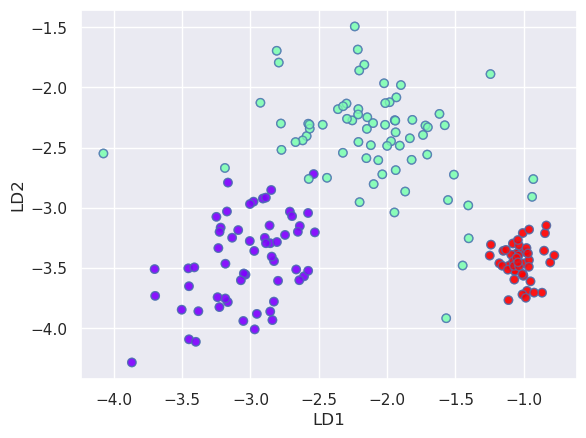

In [60]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)
plt.show()

In [61]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)

In [62]:
lda.explained_variance_ratio_

array([0.6875, 0.3125])

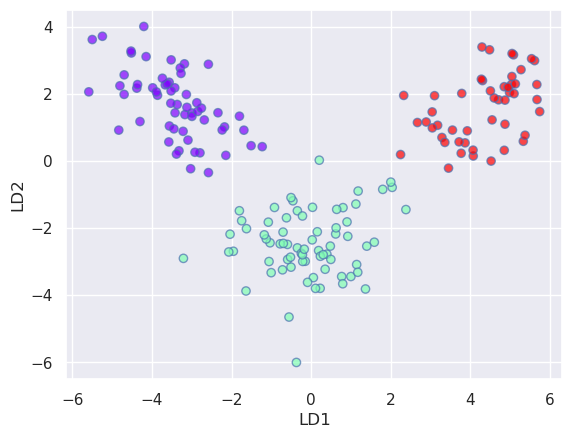

In [63]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)
plt.show()

In [64]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X, y)

In [65]:
pca.explained_variance_ratio_

array([0.9981, 0.0017])

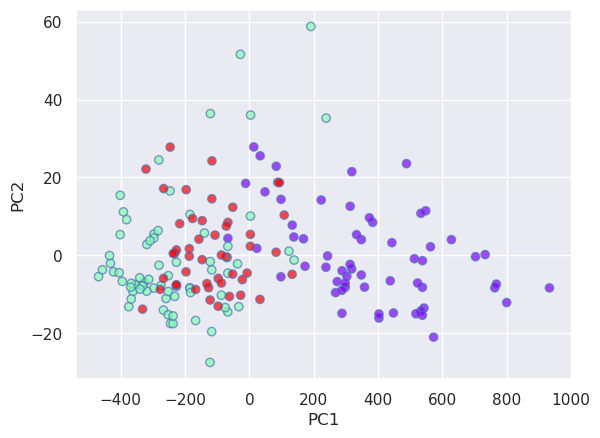

In [66]:
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(
    X_pca[:,0],
    X_pca[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)
plt.show()

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, random_state=1)

In [83]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[13,  1,  0],
       [ 0, 16,  0],
       [ 0,  0,  6]])

### __Implementación de LDA con Python__

* Dividimos el conjunto de datos en conjunto de entrenamiento y conjunto de pruebas para entrenar al modelo LDA, posteriormente hacemos un ajuste de escalas y creamos el modelo LDA para reducir la dimensión a 2 variables.

* Para probar que con 2 de 13 variables podemos hacer una predicción o clasificación de los 3 grupos de vinos, utilizamos la regresión logística y checamos la matriz de confusión

In [69]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


In [70]:
le = LabelEncoder()  # 
df['class'] = le.fit_transform(df['class'])

In [71]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [72]:
# Importacion del dataset
X = df.iloc[:, 0:13].values
y = df.iloc[:, 13].values

In [73]:
# Dividivmos el conjunto de datos en muestra de entrenamiento y 
# muestra de prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

In [74]:
# Ajuste de Escalas
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [75]:
# Aplicando LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [76]:
# Comprobamos las variables independientes resultantes con 
# una regresion Logistica para determinar que con solo dos
# variables obtenemos la predicción adecuada
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [77]:
# Prediccion del conjunto de prueba para 
# comprar los resultados
y_pred = classifier.predict(X_test)

In [78]:
# Creamos la matriz de confusion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [79]:
cm

array([[14,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  6]])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


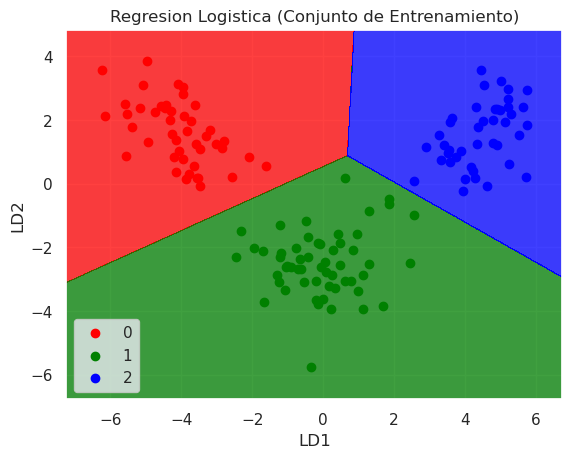

In [80]:
# Visualizacion de los datos de entrenamiento
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Regresion Logistica (Conjunto de Entrenamiento)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


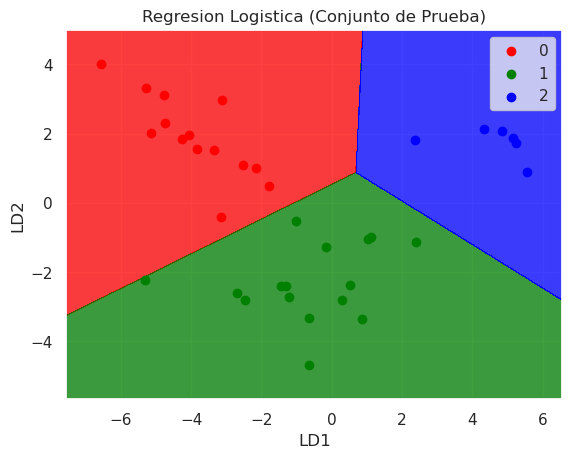

In [81]:
# Visualizacion de los resultados de prueba
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Regresion Logistica (Conjunto de Prueba)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

In [82]:
cm

array([[14,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  6]])

___

<a id='part6'></a>
# Análisis Discriminante Cuadrático 

<a id='part7'></a>
## Aspectos Generales I

- El análisis discriminante lineal (LDA) puede ser formulado de tal forma que se minimice la probabilidad total de una mala clasiﬁcación en el modelo de entrenamiento. 
<br>

- La consecuencia de la asunción de que los predictores en cada clase comparten una estructura de covarianzas comúnes fue que las fronteras entre las clases son funciones lineales de los predictores. 
<br>

- En los modelos discriminantes cuadráticos, esta asunción es relajada de modo que estructura de covarianzas para una clase especíﬁca puede ser acomodada.

- La primera consecuencia de este cambio es que las fronteras de decisión son ahora cuadráticas en el espacio de los predictores.
- El incremento en la complejidad de la función discriminante puede mejorar la performance del modelo para algunos problemas.

- Por otro lado, otra repercusión de esta generalización es que los requerimientos de los datos se vuelven más rigurosos.
<br>

- Dado que se usan matrices de covarianzas especíﬁcas para cada clase, la inversa de esas matrices deben de existir. 
<br>

- Esto implica que el número de predictores debe ser menor que el número de casos dentro de cada clase. 
<br>

- Además, los predictores dentro de cada clase no deberían de tener niveles graves de colinealidad.

<a id='part8'></a>
## Discriminante Cuadrático

- Consideramos ahora 2 clases $C_1$ y $C_2$ que siguen una distribución normal multivariada
<br>

$$x|C_1 \sim N_p(\mu_1,\Sigma_1)$$
$$x|C_2 \sim N_p(\mu_1,\Sigma_2)$$
<br>
- Esto es
<br>

$$f(x|C_1) = \frac{1}{(2\pi)^{k/2}|\Sigma|^{1/2}}exp\left(-\frac{1}{2}(x-\mu_1)^{T}\Sigma^{-1}(x-\mu_1)\right)$$
$$f(x|C_1) = \frac{1}{(2\pi)^{k/2}|\Sigma|^{1/2}}exp\left(-\frac{1}{2}(x-\mu_2)^{T}\Sigma^{-1}(x-\mu_2)\right)$$

<a id='part9'></a>
## Clasificación

- Un objeto es clasificado en la clase $C_1$ si 
$$\frac{\frac{1}{|\Sigma_1|^{1/2}}exp\left(-\frac{1}{2}(x-\mu_1)^{T}\Sigma^{-1}_1(x-\mu_1)\right)}{\frac{1}{|\Sigma_2|^{1/2}}exp\left(-\frac{1}{2}(x-\mu_2)^{T}\Sigma^{-1}_2(x-\mu_2)\right)}>\frac{\pi_2}{\pi_1}$$
<br>

- Tomando logaritmos a ambos lados y simplificando se observa que se obtiene una ecuación cuadrática, de ahí el nombre de Analísis Discriminante Cuadrático
$$x^T Ax+x^Tb+c>0$$

<a id='part10'></a>
## Fronteras de Decisión en QDA I

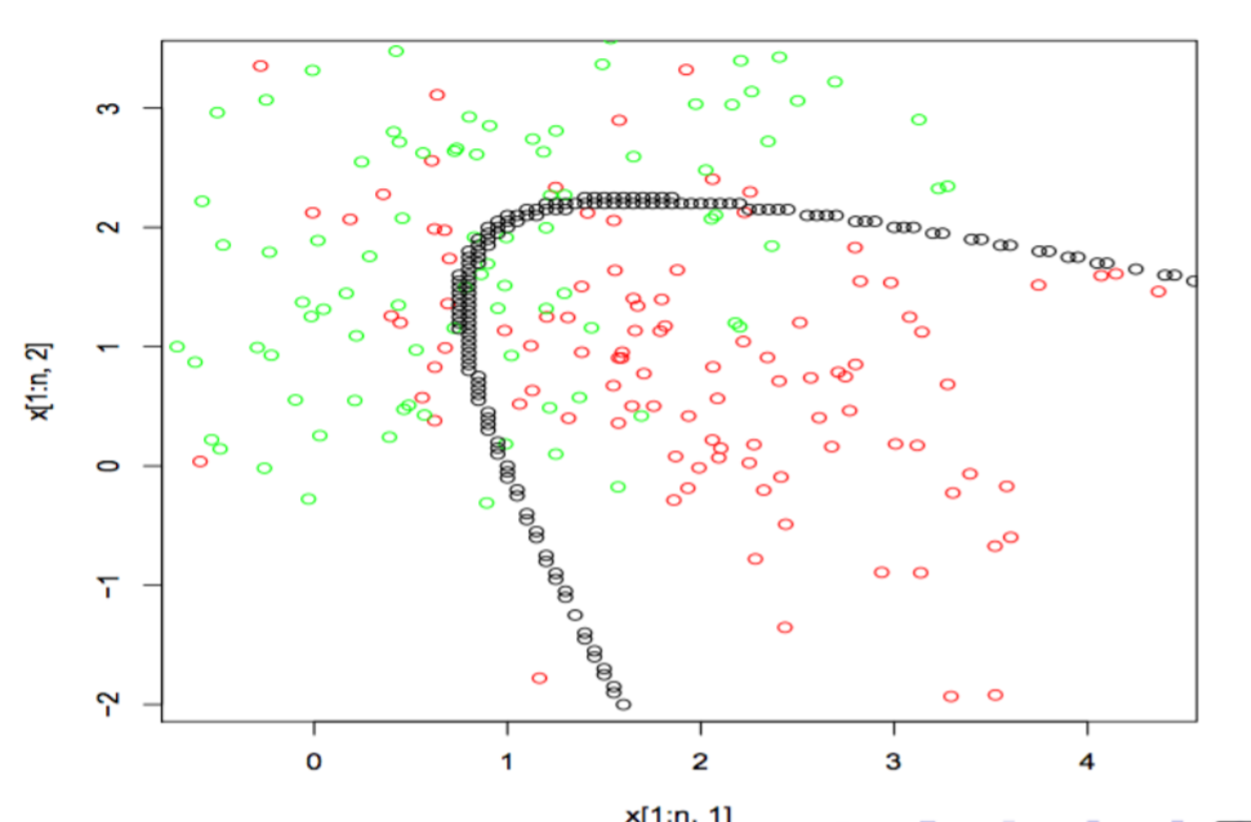

In [6]:
Image(filename='D:/Python/2. Nivel II/8/imagenes/imagen5.png', width=600) 

- La función discriminante $f_k$ depende de tres factores:
<br>

    - La varianza generalizada $|\sum|$
    - La probabilidad a priori $\pi_k$
    - El cuadrado de la distancia de Mahalanobis de x a la media poblacional $\mu_k$
    
<br>
- Aquí, una función de distancia diferente, con una diferente orientación y tamaño de la constante de distancia de la elipsoide, se utiliza para cada clase.

<a id='part11'></a>
## Estimación de parámetros en QDA I

- En la práctica, se estiman los prámetros en la data de entrenamiento
<br>

    - $\hat{\pi}_k=n_k/n,$ donde $n_k$ es el número de observaciones en la clase $k$ para $k = 1,...,K.$
    <br>
    
    - $\hat{\mu}_k=\Sigma_{Y_i=k}/n_k$ para $k=1,...,K$
    <br>
    
    - La covarianza muestral dentro de una clase
$$\hat{\Sigma}_K=\frac{1}{n_k-1}\sum_{Y_i=k}(x_i-\hat{\mu}_k)(x_i-\hat{\mu}_k)^T$$

La implementación del QDA es computancionalmente intensiva, dado que
<br>

- Necesitamos realizar inversión de matrices múltiples veces: Calcular $\hat{\Sigma_k}$ para $k=1,..., K$

In [85]:
import pandas as pd
import numpy as np

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score

### LDA

In [87]:
df = pd.read_csv('smarket.csv', usecols=range(1,10), index_col=0, parse_dates=True)
df.head()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Year,,,,,,,,
2001-01-01,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2001-01-01,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2001-01-01,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
2001-01-01,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
2001-01-01,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [91]:
X_train = df[:'2004'][['Lag1','Lag2']]
y_train = df[:'2004']['Direction']

X_test = df['2005':][['Lag1','Lag2']]
y_test = df['2005':]['Direction']

lda = LinearDiscriminantAnalysis()
model = lda.fit(X_train, y_train)

In [92]:
print(model.coef_)

[[-0.0554 -0.0443]]


In [93]:
pred=model.predict(X_test)
print(np.unique(pred, return_counts=True))

(array(['Down', 'Up'], dtype='<U4'), array([ 70, 182]))


In [94]:
print(confusion_matrix(pred, y_test))
print(classification_report(y_test, pred, digits=3))

[[ 35  35]
 [ 76 106]]
              precision    recall  f1-score   support

        Down      0.500     0.315     0.387       111
          Up      0.582     0.752     0.656       141

    accuracy                          0.560       252
   macro avg      0.541     0.534     0.522       252
weighted avg      0.546     0.560     0.538       252



### QDA

In [99]:
qda = QuadraticDiscriminantAnalysis()
model2 = qda.fit(X_train, y_train)
print(model2.priors_)
print(model2.means_)

[0.492 0.508]
[[ 0.0428  0.0339]
 [-0.0395 -0.0313]]


In [100]:
pred2=model2.predict(X_test)
print(np.unique(pred2, return_counts=True))
print(confusion_matrix(pred2, y_test))
print(classification_report(y_test, pred2, digits=3))

(array(['Down', 'Up'], dtype=object), array([ 50, 202]))
[[ 30  20]
 [ 81 121]]
              precision    recall  f1-score   support

        Down      0.600     0.270     0.373       111
          Up      0.599     0.858     0.706       141

    accuracy                          0.599       252
   macro avg      0.600     0.564     0.539       252
weighted avg      0.599     0.599     0.559       252

